In [1]:
# imports
import pandas as pd
import numpy as np
import pickle
import re
import pandas as pd

## The following data was generated using code that can be found on GitHub (https://github.com/mtchem/Twitter-Politics/blob/master/data_wrangle/Data_Wrangle.ipynb )

In [2]:
# load federal document data from pickle file
fed_reg_data = r'C:/Users/aregel/Documents/springboard/Twitter-Politics/data/fed_reg_date_index.pickle'
fed_data = pd.read_pickle(fed_reg_data)
# load twitter data from csv
twitter_file_path = r'C:\Users\aregel\Documents\springboard\Twitter-Politics\data\twitter_01_20_17_to_12-8-17.pickle'
twitter_data = pd.read_pickle(twitter_file_path)

***
## In order to explore the twitter and executive document data I will look at the following:
1. Determine the most used hashtags
2. Determine who President Trump tweeted at(@) the most
3. Create a word frequency plot for the most used words in the twitter data and the presidental documents
4. Find words that both data sets have in common, and determine those words document frequency (what percentage of documents those words appear in)
***

In [5]:
# imports
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
import itertools
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aregel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### *Plot the most used hashtags and @ tags*

In [6]:
# find the most used hashtags
hashtag_freq = Counter(list(itertools.chain(*(twitter_data.hash_tags))))
hashtag_top20 = hashtag_freq.most_common(20)
# find the most used @ tags
at_tag_freq = Counter(list(itertools.chain(*(twitter_data['@_tags']))))
at_tags_top20 = at_tag_freq.most_common(20)

print(hashtag_top20)

[('#USAðŸ‡ºðŸ‡¸', 24), ('#MAGA', 17), ('#MAGAðŸ‡ºðŸ‡¸', 12), ('#FakeNews', 11), ('#TaxReform', 10), ('#HurricaneHarvey', 10), ('#UNGA', 9), ('#AmericaFirstðŸ‡ºðŸ‡¸', 8), ('#MAGA!', 7), ('#APEC2017', 7), ('#WeeklyAddressðŸ‡ºðŸ‡¸', 7), ('#PuertoRico', 6), ('#MakeAmericaGreatAgainðŸ‡ºðŸ‡¸', 5), ('#Harvey', 5), ('#USA', 5), ('#ICYMI-', 5), ('#LESM', 4), ('#Fake', 4), ('#G20Summit', 4), ('#KatesLaw', 4)]


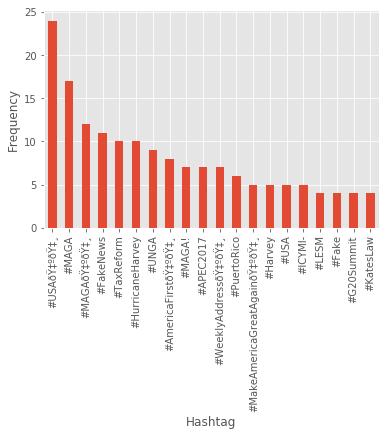

In [7]:
# frequency plot for the most used hashtags
df = pd.DataFrame(hashtag_top20, columns=['Hashtag', 'frequency'])
df.plot(kind='bar', x='Hashtag',legend=None)
plt.ylabel('Frequency')
plt.show()

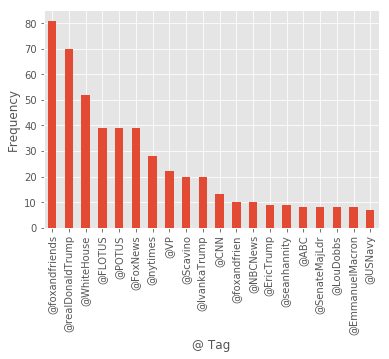

In [8]:
# frequency plot for the most used @ tags
df = pd.DataFrame(at_tags_top20, columns=['@ Tag', 'frequency'])
df.plot(kind='bar', x='@ Tag',legend=None)
plt.ylabel('Frequency')
plt.show()

### *Top used words for the twitter data and the federal document data*

#### Define a list of words that have no meaning, such as 'a', 'the', and punctuation

In [9]:
# use nltk's list of stopwords
stop_words = set(stopwords.words('english'))
# add puncuation to stopwords
stop_words.update(['.', ',','get','going','one', 'amp','like' '"','...',"''", "'","n't", '?', '!', ':', ';', '#','@', '(', ')', 'https', '``',"'s", 'rt' ]) 

#### Make a list of hashtags and @entites used in the twitter data

In [10]:
# combine the hashtags and @ tags, flatten the list of lists, keep the unique items
stop_twitter = set(list(itertools.chain(*(twitter_data.hash_tags + twitter_data['@_tags']))))

#### The federal document data also has some words that need to be removed.  The words Federal Registry and the date are on the top of every page so they should be removed. Also, words like 'shall', 'order', and 'act' are used quite a bit but don't convay much meaning, so I'm going to remove those words as well.

In [11]:
stop_fed_docs = ['united', 'states', '1','2','3','4','5','6','7','8','9','10', '11','12','13','14','15',
                 '16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','2016', '2015','2014',
                 'federal','shall', '4790', 'national', '2017', 'order','president', 'presidential', 'sep',
                 'register','po','verdate', 'jkt','00000','frm','fmt','sfmt','vol','section','donald',
                 'act','america', 'executive','secretary', 'law', 'proclamation','81','day','including', 'code', 
                 '4705','authority', 'agencies', '241001', 'americans','238001','year', 'amp',
                 'government','agency','hereby','people','public','person','state','american','two',
                 'nation', '82', 'sec', 'laws', 'policy','set','fr','appropriate','doc','new','filed',
                 'u.s.c','department','ii','also','office','country','within','memorandum', 'director', 'us', 
                 'sunday','monday', 'tuesday','wednesday','thursday', 'friday', 'saturday', 'title','upon',
                 'constitution','support', 'vested','part', 'month', 'subheading','foreign','general','january',
                 'february', 'march', 'april','may','june','july','august', 'september', 'october',
                 'november', 'december', 'council','provide','consistent','pursuant','thereof','00001','documents',
                 '11:15', 'area','management','following','house','white','week','therefore',
                 'amended', 'continue', 'chapter','must','years', '00002', 'use','make','date','one',
                 'many','12', 'commission','provisions', 'every','u.s.','functions','made','hand','necessary', 
                 'witness','time','otherwise', 'proclaim', 'follows','thousand', 'efforts','jan', 'trump','j.',
                 'applicable', '4717','whereof','hereunto', 'subject', 'report','3—', '3295–f7–p']

#### Create functions that removes the stop words for each of the datasets

In [12]:
def remove_from_fed_data(token_lst):
    # remove stopwords and one letter words
    filtered_lst = [word for word in token_lst if word.lower() not in stop_fed_docs and len(word) > 1 and word.lower() not in stop_words]
    return filtered_lst 

In [13]:
def remove_from_twitter_data(token_lst):
    # remove stopwords and one letter words
    filtered_lst = [word for word in token_lst if word.lower() not in stop_words and len(word) > 1 and word.lower() not in stop_twitter]
    return filtered_lst       

#### Remove all of the stop words from the tokenized twitter and document data

In [14]:
# apply the remove_stopwords function to all of the tokenized twitter text
twitter_words = twitter_data.text_tokenized.apply(lambda x: remove_from_twitter_data(x))
# apply the remove_stopwords function to all of the tokenized document text
document_words = fed_data.token_text.apply(lambda x: remove_from_fed_data(x))

# flatten each the word lists into one list
all_twitter_words = list(itertools.chain(*twitter_words))
all_document_words =list(itertools.chain(*document_words))

#### Count how many times each word is used for both datasets

In [15]:
# create a dictionary using the Counter method, where the key is a word and the value is the number of time it was used
twitter_freq = Counter(all_twitter_words)
doc_freq = Counter(all_document_words)
# determine the top 30 words used in the twitter data
top_30_tweet = twitter_freq.most_common(30)
top_30_fed = doc_freq.most_common(30)

### *Plot the most used words for the twitter data and the federal document data*

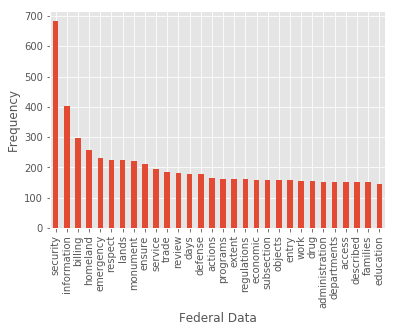

In [16]:
# frequency plot for the most used Federal Data
df = pd.DataFrame(top_30_fed, columns=['Federal Data', 'frequency'])
df.plot(kind='bar', x='Federal Data',legend=None)
plt.ylabel('Frequency')
plt.show()

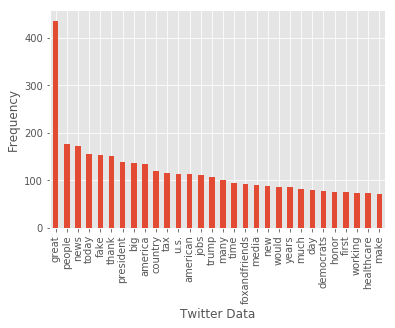

In [17]:
# frequency plot for the most used words in the twitter data
df = pd.DataFrame(top_30_tweet, columns=['Twitter Data', 'frequency'])
df.plot(kind='bar', x='Twitter Data',legend=None)
plt.ylabel('Frequency')
plt.show()

#### Determine all of the words that are used in both datasets

In [18]:
# find the unique words in each dataset
joint_words = list((set(all_document_words)).intersection(all_twitter_words))

#### Create a dictionary with the unique joint words as keys

In [19]:
# make array of zeros
values = np.zeros(len(joint_words))
# create dictionary
joint_words_dict = dict(zip(joint_words, values))

#### Create dictionaries for both datasets with document frequency for each joint word  

In [20]:
# create a dictionary with a word as key, and a value = number of documents that contain the word for Twitter
twitter_document_freq = joint_words_dict.copy()
for word in joint_words:
    for lst in twitter_data.text_tokenized:
        if word in lst:
            twitter_document_freq[word]= twitter_document_freq[word] + 1
            
# create a dictionary with a word as key, and a value = number of documents that contain the word for Fed Data
fed_document_freq = joint_words_dict.copy()
for word in joint_words:
    for lst in fed_data.token_text:
        if word in lst:
            fed_document_freq[word]= fed_document_freq[word] + 1

#### Create dataframe with the word and the document percentage for each data set

In [21]:
df = pd.DataFrame([fed_document_freq, twitter_document_freq]).T

In [34]:
df.columns = ['Fed', 'Tweet']
df['% Fed'] = df.Fed/len(df.Fed)
df['% Tweet'] = df.Tweet/len(df.Tweet)

In [41]:
top_joint_fed = df[['% Fed','% Tweet']].sort_values(by='% Fed', ascending=False)[0:50] 
top_joint_tweet = df[['% Fed','% Tweet']].sort_values(by='% Tweet', ascending=False)[0:50] 

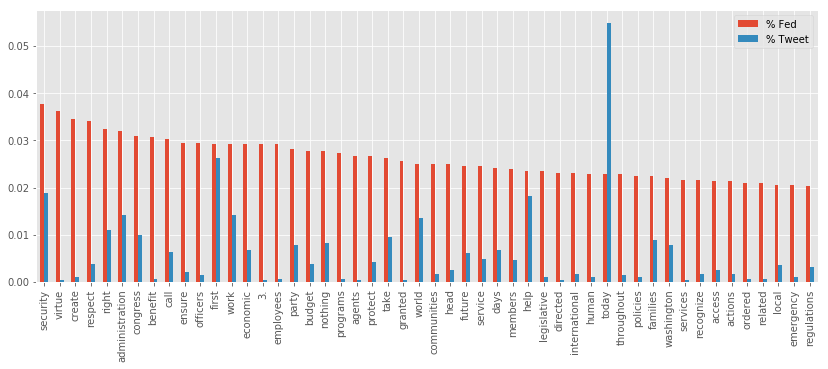

In [40]:
top_joint_fed.plot.bar(figsize=(14,5))
plt.show()

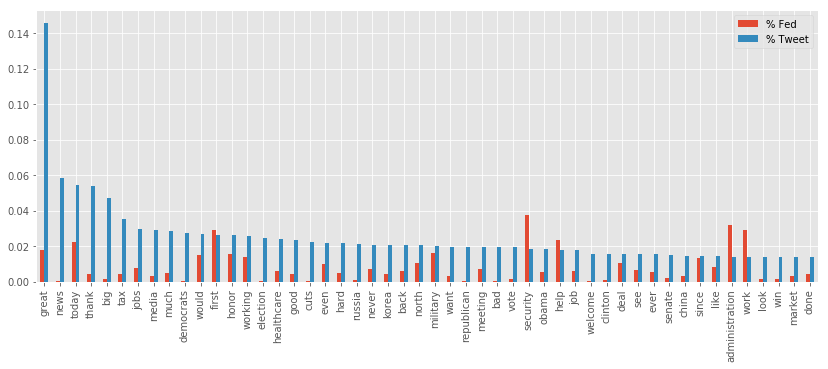

In [42]:
top_joint_tweet.plot.bar(figsize=(14,5))
plt.show()

In [44]:
df['diff %'] = df['% Fed'] - df['% Tweet']

In [50]:
top_same = df[df['diff %'] == 0].sort_values(by='% Fed', ascending=False)[0:50]

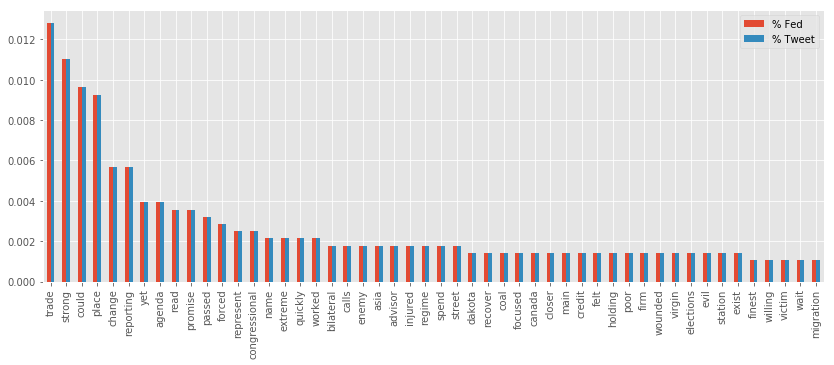

In [51]:
top_same[['% Fed', '% Tweet']].plot.bar(figsize=(14,5))
plt.show()